In [257]:
import pickle
import warnings
%matplotlib inline
import numpy as np 
import pandas as pd
import seaborn as sns
from astropy.table import Table 
from sklearn import svm, metrics
from matplotlib import pyplot as plt
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report, confusion_matrix  
warnings.filterwarnings('ignore')

# Testing Our Models

Loading in the three respective models

In [258]:
log = joblib.load('LogReg.joblib') #Logistic Regression
mlp = joblib.load('NN.joblib') #Neural Network
svm = pickle.load(open('svm_model.pickle', 'rb')) #SVM model

# Reading in Test file and Scaling

Scaling using sklearn standard scaler

In [259]:
test = pd.read_csv("group20_test.csv")
m = test.shape[0]
n = test.shape[1]-1
X_test = test.drop(['784'], axis=1)
y_test = test['784'] 

scaler = StandardScaler()
scaler.fit(X_test)
X_test = scaler.transform(X_test)

# Logistic Regression Testing

In [260]:
predictionsLog = log.predict(X_test)

### Accuracy Score:

In [261]:
log.score(X_test, y_test)

0.811

### Confusion Matrix:

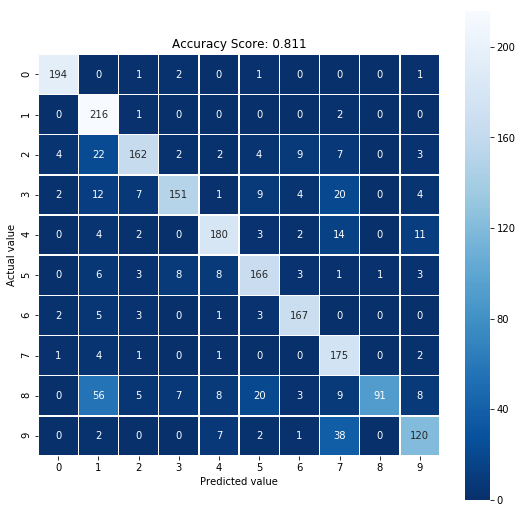

In [262]:
cm = confusion_matrix(y_test,predictionsLog)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual value');
plt.xlabel('Predicted value');
all_sample_title = 'Accuracy Score: {0}'.format(best_model.score(X_test, y_test) )
plt.title(all_sample_title, size = 12);

### Testing Metrics:

In [263]:
Recall =np.diag(cm) / np.sum(cm,axis=1) 
Recall = (np.mean(Recall))*100
Precision = np.diag(cm) / np.sum(cm,axis=0)  
Precision = (np.mean(Precision))*100
f1 = (2*Precision*Recall)/(Precision + Recall)

print("Recall     {:0.2f}".format(Recall))
print("Precision  {:0.2f}".format(Precision))
print("F1 Score   {:0.2f}".format(f1))

Recall     81.20
Precision  83.64
F1 Score   82.40


### Per-Class Accuracy:

In [264]:
a = [] *10
b = [] *10
results = [] * 10
for i in range(10):
    a.append(cm[i][i])
    b.append(np.sum(cm[:][i]))
    results.append(a[i]/b[i] * 100)
    print("The accurarcy for class ",i, "is " , float(results[i]))

The accurarcy for class  0 is  97.48743718592965
The accurarcy for class  1 is  98.63013698630137
The accurarcy for class  2 is  75.34883720930232
The accurarcy for class  3 is  71.9047619047619
The accurarcy for class  4 is  83.33333333333334
The accurarcy for class  5 is  83.41708542713567
The accurarcy for class  6 is  92.26519337016575
The accurarcy for class  7 is  95.1086956521739
The accurarcy for class  8 is  43.96135265700483
The accurarcy for class  9 is  70.58823529411765


### Additional Relevant Analyses:

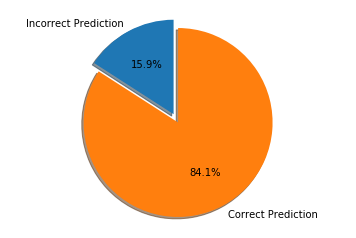

Predicted 1622 correctly out of 2000 samples





In [265]:
correct = 0
samples = 2000
for i in range(10):
    correct = correct + (cm[i][i])
incorrect = samples - correct
labels = 'Incorrect Prediction', 'Correct Prediction'
sizes = [incorrect, samples]
explode = (0, 0.1)  # only "explode" the 2nd slice 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
print("Predicted " +str(correct) + " correctly out of " + str(samples) + " samples")
print('\n\n')

# Neural Network Testing

In [266]:
predictionsNN = mlp.predict(X_test)  

### Accuracy Score

In [267]:
mlp.score(X_test, y_test)

0.94

### Confusion Matrix

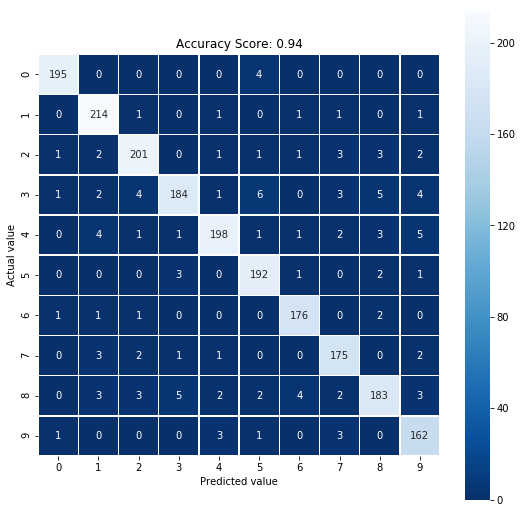

In [268]:
cm = confusion_matrix(y_test,predictionsNN)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual value');
plt.xlabel('Predicted value');
all_sample_title = 'Accuracy Score: {0}'.format(mlp.score(X_test, y_test) )
plt.title(all_sample_title, size = 12);

### Testing Metrics

In [269]:
Recall =np.diag(cm) / np.sum(cm,axis=1) 
Recall = (np.mean(Recall))*100
Precision = np.diag(cm) / np.sum(cm,axis=0)  
Precision = (np.mean(Precision))*100
f1 = (2*Precision*Recall)/(Precision + Recall)

print("Recall     {:0.2f}".format(Recall))
print("Precision  {:0.2f}".format(Precision))
print("F1 Score   {:0.2f}".format(f1))

Recall     94.10
Precision  93.97
F1 Score   94.04


### Per-Class Accuracy:

In [270]:
a = [] *10
b = [] *10
results = [] * 10
for i in range(10):
    a.append(cm[i][i])
    b.append(np.sum(cm[:][i]))
    results.append(a[i]/b[i] * 100)
    print("The accurarcy for class ",i, "is " , float(results[i]))

The accurarcy for class  0 is  97.98994974874373
The accurarcy for class  1 is  97.71689497716895
The accurarcy for class  2 is  93.48837209302326
The accurarcy for class  3 is  87.61904761904762
The accurarcy for class  4 is  91.66666666666666
The accurarcy for class  5 is  96.4824120603015
The accurarcy for class  6 is  97.23756906077348
The accurarcy for class  7 is  95.1086956521739
The accurarcy for class  8 is  88.40579710144928
The accurarcy for class  9 is  95.29411764705881


### Additional Relevant Analyses:

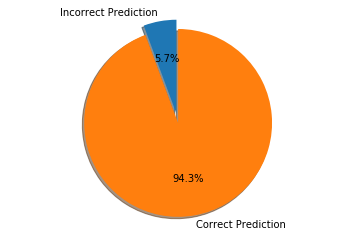

Predicted 1880 correctly out of 2000 samples





In [271]:
correct = 0
samples = 2000
for i in range(10):
    correct = correct + (cm[i][i])
incorrect = samples - correct
labels = 'Incorrect Prediction', 'Correct Prediction'
sizes = [incorrect, samples]
explode = (0, 0.1)  # only "explode" the 2nd slice 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
print("Predicted " +str(correct) + " correctly out of " + str(samples) + " samples")
print('\n\n')

# SVM Testing

In [272]:
predictionsSVM = svm.predict(X_test)

### Accuracy Score:

In [273]:
svm.score(X_test, y_test)

0.758

In [274]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictionsSVM)*100

75.8

### Confusion Matrix:

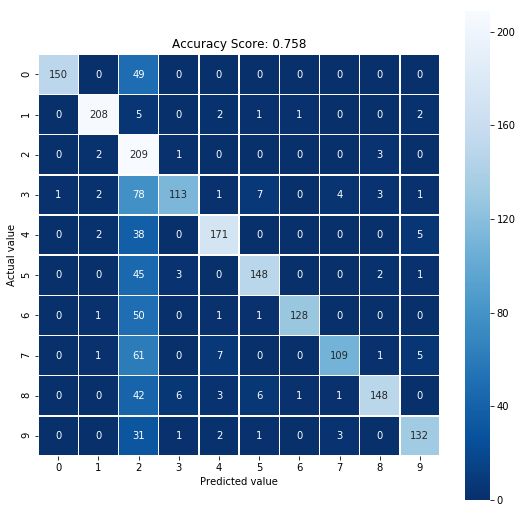

In [275]:
cm = confusion_matrix(y_test,predictionsSVM)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual value');
plt.xlabel('Predicted value');
all_sample_title = 'Accuracy Score: {0}'.format(svm.score(X_test, y_test) )
plt.title(all_sample_title, size = 12);

### Testing Metrics:

In [276]:
Recall =np.diag(cm) / np.sum(cm,axis=1) 
Recall = (np.mean(Recall))*100
Precision = np.diag(cm) / np.sum(cm,axis=0)  
Precision = (np.mean(Precision))*100
f1 = (2*Precision*Recall)/(Precision + Recall)

print("Recall     {:0.2f}".format(Recall))
print("Precision  {:0.2f}".format(Precision))
print("F1 Score   {:0.2f}".format(f1))

Recall     75.40
Precision  87.91
F1 Score   81.18


### Per-Class Accuracy:

In [277]:
a = [] *10
b = [] *10
results = [] * 10
for i in range(10):
    a.append(cm[i][i])
    b.append(np.sum(cm[:][i]))
    results.append(a[i]/b[i] * 100)
    print("The accurarcy for class ",i, "is " , float(results[i]))

The accurarcy for class  0 is  75.37688442211056
The accurarcy for class  1 is  94.97716894977168
The accurarcy for class  2 is  97.20930232558139
The accurarcy for class  3 is  53.80952380952381
The accurarcy for class  4 is  79.16666666666666
The accurarcy for class  5 is  74.37185929648241
The accurarcy for class  6 is  70.71823204419888
The accurarcy for class  7 is  59.2391304347826
The accurarcy for class  8 is  71.49758454106279
The accurarcy for class  9 is  77.64705882352942


### Additional Relevant Analyses:

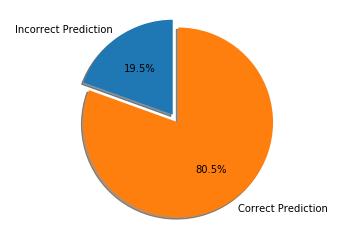

Predicted 1516 correctly out of 2000 samples





In [278]:
correct = 0
samples = 2000
for i in range(10):
    correct = correct + (cm[i][i])
incorrect = samples - correct
labels = 'Incorrect Prediction', 'Correct Prediction'
sizes = [incorrect, samples]
explode = (0, 0.1)  # only "explode" the 2nd slice 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
print("Predicted " +str(correct) + " correctly out of " + str(samples) + " samples")
print('\n\n')